<a href="https://colab.research.google.com/github/ginkyenglee/KSH2025/blob/main/%EB%8C%80%ED%95%9C%ED%98%88%EC%95%A1%ED%95%99%ED%9A%8C_%EC%B2%AD%EB%85%84%EC%9C%84%EC%9B%90%ED%9A%8C(%EA%B8%88%EA%B0%95%ED%8F%AC%EB%9F%BC)_%EB%8F%99%EA%B3%84_%EC%8B%AC%ED%8F%AC%EC%A7%80%EC%97%84_%EC%9C%A0%EC%A0%84%EC%B2%B4_%EC%97%B0%EA%B5%AC%EC%97%90%EC%84%9C_%EC%9E%90%EC%A3%BC_%ED%99%9C%EC%9A%A9%ED%95%98%EB%8A%94_%EB%8F%84%EC%8B%9D_%EA%B7%B8%EB%A6%AC%EA%B8%B0(%EC%8B%A4%EC%8A%B5%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd # 표 형태(xlsx, csv,...)의 데이토 조작, 분석을 위한 python 라이브러리
import seaborn as sns # 데이터 시각화를 위한 python 라이브러리
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # 나만의 Categorical 컬러맵 만들기에 활용되는 라이브러리
import numpy as np
from matplotlib import gridspec

# 1. 내 데이터 불러오기(csv, excel)

## 1-1. sample data 다운받기
 1. 파일이 존재하는 링크에 접속하여 직접 다운로드 받기
  1. [https://github.com/ginkyenglee/KSH2025](https://github.com/ginkyenglee/KSH2025) 에서 다운로드 버튼
  2. KSH2025 폴더 생성
  3. sample_dataset.csv 를 KSH2025 폴더에 업로드

2. 명령어로 다운받기 `!git clone https://github.com/ginkyenglee/KSH2025.git` (느낌표 포함)

In [2]:
!git clone https://github.com/ginkyenglee/KSH2025.git

Cloning into 'KSH2025'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 14.57 KiB | 426.00 KiB/s, done.


## 1-2. 데이터 불러오기 및 확인

In [3]:
# 내 실험 데이터 불러오기 (csv, excel 파일)
data = pd.read_csv('./KSH2025/sample_dataset.csv', index_col = 0)
# data = pd.read_excel('./KSH2025/sample_dataset.xlsx', index_col = 0)

In [4]:
data.head()

,patient_id,Disease,death,male,age at first symptom,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,structural_variation,somatic_mutation
0,48,D,False,True,5,False,False,False,False,False,True,True,True,False,False,NaN,False
1,41,B,False,False,35,False,True,True,True,False,False,True,True,True,True,LOH,True
2,97,D,False,True,13,False,True,False,False,False,False,False,False,False,False,NaN,False
3,96,A,True,True,44,False,False,False,True,False,False,False,False,False,False,NaN,False
4,88,B,False,False,37,False,True,False,False,False,False,False,True,False,False,Gain,True


# 2. 데이터 sorting 해보기

In [5]:
data = data.sort_values(by = ['Disease'], ascending = [True])
data.head(20)

,patient_id,Disease,death,male,age at first symptom,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,structural_variation,somatic_mutation
27,14,A,True,True,49,False,True,False,False,False,False,True,False,False,False,Loss,True
30,66,A,False,False,38,True,False,True,False,False,False,False,False,False,False,NaN,True
3,96,A,True,True,44,False,False,False,True,False,False,False,False,False,False,NaN,False
76,62,A,True,True,11,False,True,True,True,True,False,False,False,False,False,NaN,False
94,0,A,True,False,71,False,False,False,False,False,False,False,False,True,False,NaN,False
6,57,A,False,False,14,False,False,True,False,False,False,False,False,False,False,NaN,False
40,21,A,True,False,45,False,True,False,False,False,False,True,False,False,False,Loss,False
15,40,A,True,False,63,False,False,False,False,False,False,False,True,True,True,Gain,False
69,38,B,True,True,15,False,False,True,False,True,False,False,False,False,False,NaN,False
68,5,B,False,False,58,False,False,False,False,False,False,False,False,False,False,NaN,False


# 3. 도식 그려보기

## 3-1. heatmap 그려보기

### 1단계 : 숫자 데이터 heatmap으로 그려보기

In [6]:
target_data = data[['age at first symptom']].T
target_data

,27,30,3,76,94,6,40,15,69,68,...,61,17,80,63,77,34,66,25,86,0
age at first symptom,49,38,44,11,71,14,45,63,15,58,...,52,72,27,21,48,13,34,15,33,5


<Axes: >

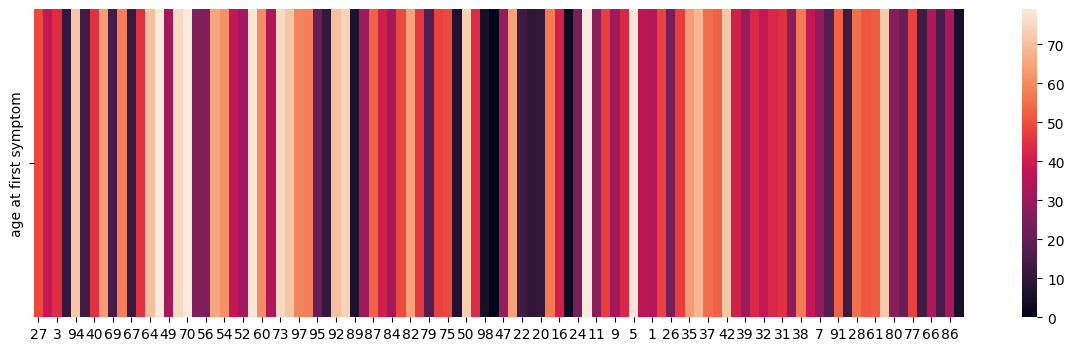

In [7]:
plt.figure(figsize = (15,4))
sns.heatmap(target_data)

<Axes: >

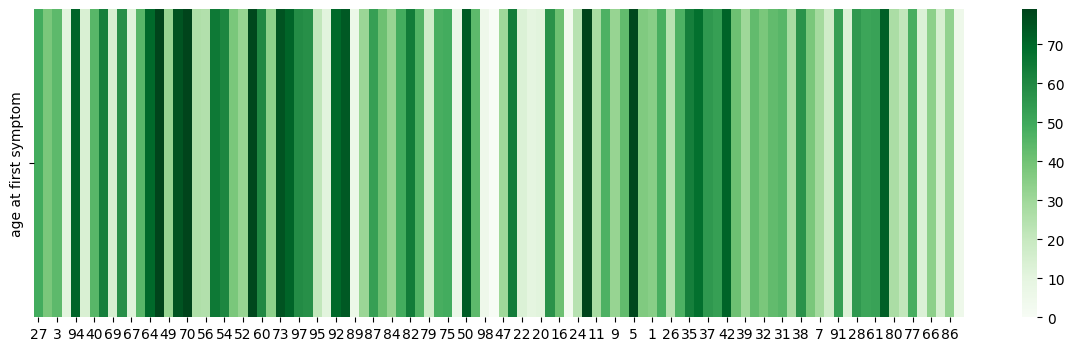

In [8]:
plt.figure(figsize = (15,4))
sns.heatmap(target_data, cmap = "Greens") #from matplotlib import colormaps을 통해 가능한 colormap 리스트를 확인 가능

### 2단계 : True, False 데이터 그려보기

In [9]:
target_data = data[['gene1','gene2','gene3','gene4','gene5','gene6','gene7','gene8','gene9','gene10']].T
target_data

,27,30,3,76,94,6,40,15,69,68,...,61,17,80,63,77,34,66,25,86,0
gene1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
gene2,True,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
gene3,False,True,False,True,False,True,False,False,True,False,...,False,False,True,False,True,True,False,False,False,False
gene4,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
gene5,False,False,False,True,False,False,False,False,True,False,...,False,True,False,True,False,False,False,True,False,False
gene6,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
gene7,True,False,False,False,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,True,True
gene8,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
gene9,False,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
gene10,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


<Axes: >

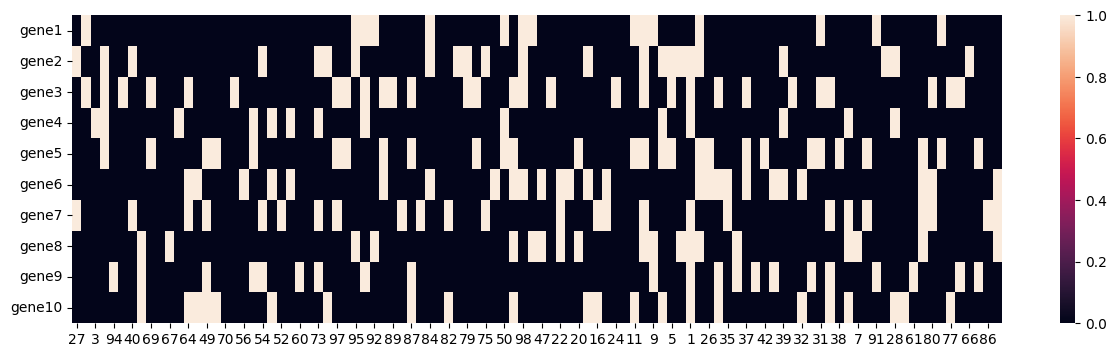

In [10]:
plt.figure(figsize = (15,4))
sns.heatmap(target_data)

<Axes: >

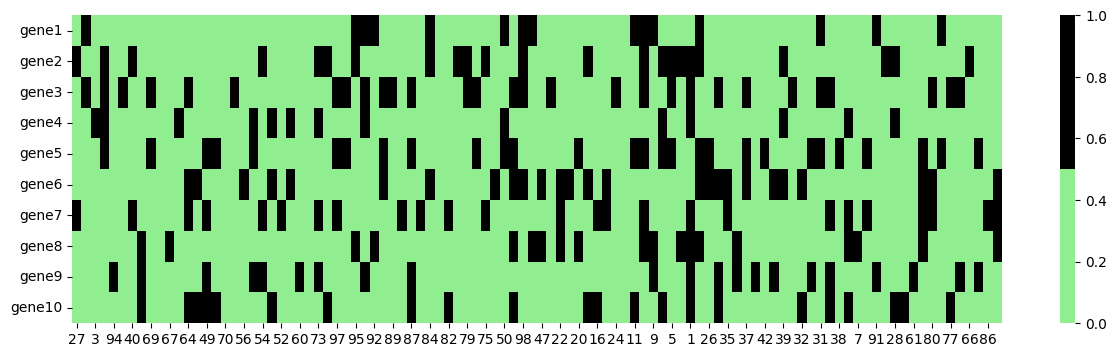

In [11]:
# 나만의 컬러맵 만들기
cmap = ListedColormap(["lightgreen", "black"])

plt.figure(figsize = (15,4))
sns.heatmap(target_data, cmap = cmap)

### 3단계 : Categorical 데이터 heatmap으로 그려보기

In [13]:
target_data = data[['Disease']].T
target_data

,27,30,3,76,94,6,40,15,69,68,...,61,17,80,63,77,34,66,25,86,0
Disease,A,A,A,A,A,A,A,A,B,B,...,D,D,D,D,D,D,D,D,D,D


In [14]:
# 왜 오류가 날까요?
plt.figure(figsize = (15,4))
sns.heatmap(target_data)

ValueError: could not convert string to float: 'A'

<Figure size 1500x400 with 0 Axes>

In [15]:
# categorical 데이터를 숫자로 매핑해주기
disease2num = {"A" : 0, "B":1, "C":2, "D":3}
disease2num_data = target_data.T['Disease'].map(disease2num)
disease2num_data = disease2num_data.values.reshape(1,-1)

In [16]:
disease2num_data

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

<Axes: >

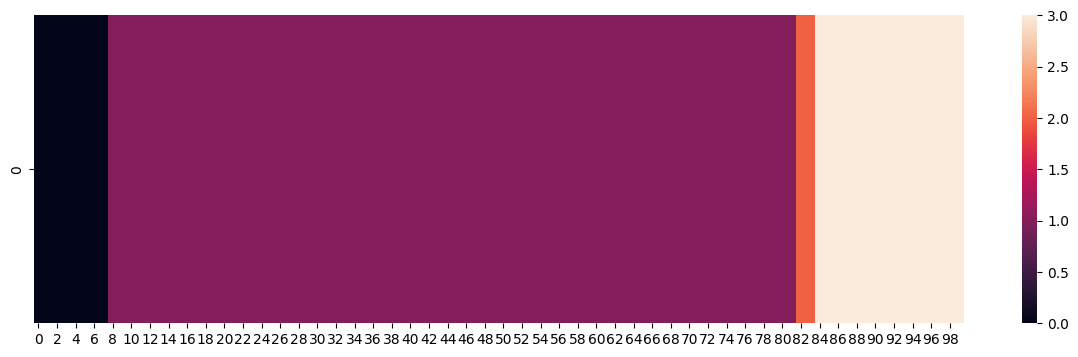

In [17]:
plt.figure(figsize = (15,4))
sns.heatmap(disease2num_data)

<Axes: >

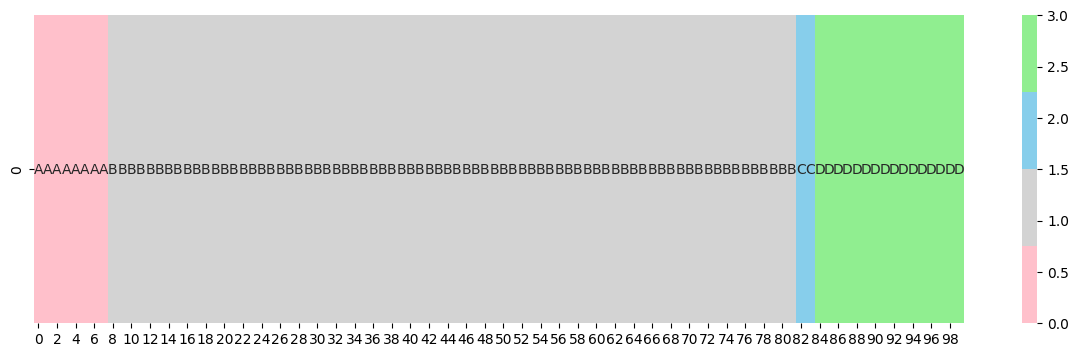

In [18]:
cmap = ListedColormap(["pink", "lightgrey","skyblue","lightgreen"])
plt.figure(figsize = (15,4))
sns.heatmap(disease2num_data, cmap = cmap,  annot = target_data, fmt = 's')

## 3-2. 그림 저장하기

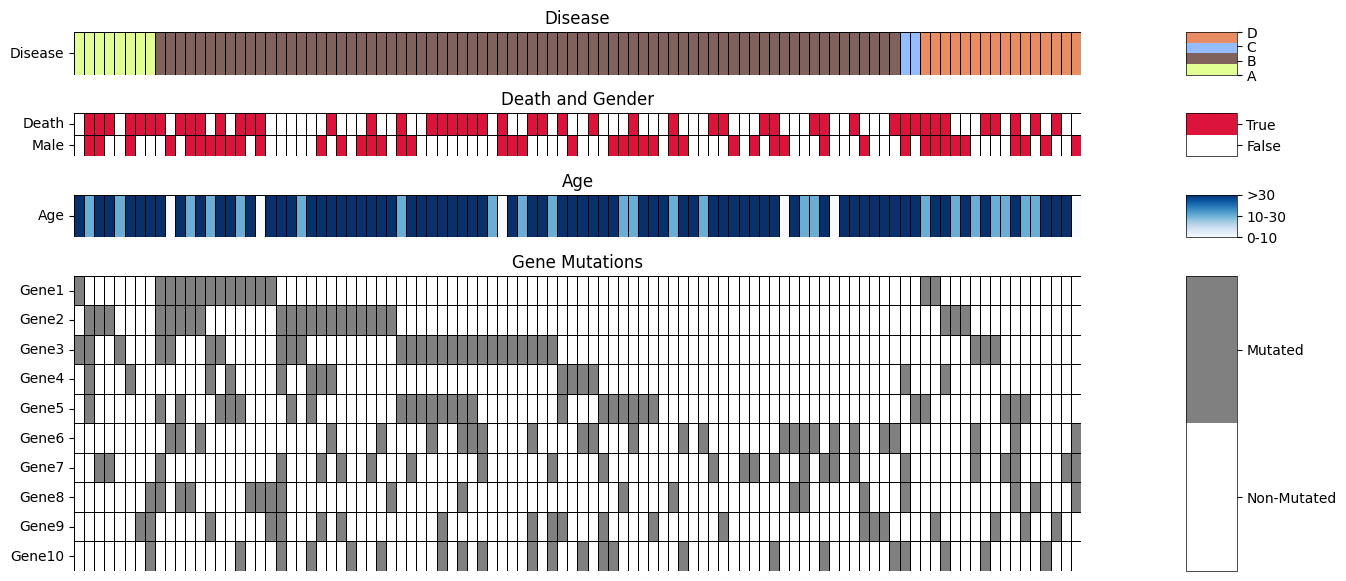

In [24]:
fig = plt.figure(figsize=(15, 7))
gs = gridspec.GridSpec(5, 2, width_ratios=[20, 1], height_ratios=[1, 1, 1, 3, 3], wspace=0.2, hspace=0.5)

# 데이터 준비
disease2num = {"A": 0, "B": 1, "C": 2, "D": 3}
data["Disease_numeric"] = data["Disease"].map(disease2num)

death_colors = ["white", "crimson"]
death_cmap = ListedColormap(death_colors)

mutated_colors = ["white", "grey"]
mutated_cmap = ListedColormap(mutated_colors)

disease_colors = ["#E2FF94", "#80615C", "#94BCFF", "#E88C64"]
disease_cmap = ListedColormap(disease_colors)

data["age_string"] = data["age at first symptom"].apply(
    lambda x: "0-10" if x < 10 else ("10-30" if x < 30 else ">30")
)
agestr2num = {"0-10": 0, "10-30": 1, ">30": 2}
data["age_numeric"] = data["age_string"].map(agestr2num)

data = data.sort_values(
    by=["Disease", "gene1", "gene2", "gene3", "gene4", "gene5"],
    ascending=[True, False, False, False, False, False],
)

# Disease Heatmap
ax1 = fig.add_subplot(gs[0, 0])
cbar_ax1 = fig.add_subplot(gs[0, 1])
sns.heatmap(
    data=data[["Disease_numeric"]].T,
    cmap=disease_cmap,
    cbar=True,
    cbar_ax=cbar_ax1,
    linewidths=0.5,
    linecolor="black",
    ax=ax1,
)
ax1.set_title("Disease", fontsize=12)
ax1.set_xticks([])
ax1.set_yticks([0.5])
ax1.set_yticklabels(["Disease"], rotation=0)

cbar_ax1.yaxis.set_ticks([0, 1, 2, 3])  # Adjusting ticks to match the color scale
cbar_ax1.yaxis.set_ticklabels(["A", "B", "C", "D"])

for spine in cbar_ax1.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(.5)

# Death and Gender Heatmap
ax2 = fig.add_subplot(gs[1, 0])
cbar_ax2 = fig.add_subplot(gs[1, 1])
sns.heatmap(
    data=data[["death","male"]].T,
    cmap=death_cmap,
    cbar=True,
    cbar_ax=cbar_ax2,
    linewidths=0.5,
    linecolor="black",
    ax=ax2,
)
ax2.set_title("Death and Gender", fontsize=12)
ax2.set_xticks([])
ax2.set_yticks([0.5, 1.5])
ax2.set_yticklabels(["Death", "Male"], rotation=0)

cbar_ax2.yaxis.set_ticks([0.25, 0.75])
cbar_ax2.yaxis.set_ticklabels(["False", "True"])
for spine in cbar_ax2.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(.5)


# Age Heatmap
ax3 = fig.add_subplot(gs[2, 0])
cbar_ax3 = fig.add_subplot(gs[2, 1])
sns.heatmap(
    data=data[["age_numeric"]].T,
    cmap="Blues",
    cbar=True,
    cbar_ax=cbar_ax3,
    linewidths=0.5,
    linecolor="black",
    ax=ax3,
)
ax3.set_title("Age", fontsize=12)
ax3.set_xticks([])
ax3.set_yticks([0.5])
ax3.set_yticklabels(["Age"], rotation=0)

cbar_ax3.yaxis.set_ticks([0, 1, 2])
cbar_ax3.yaxis.set_ticklabels(["0-10", "10-30", ">30"])
for spine in cbar_ax3.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(.5)

# Genes Heatmap
ax4 = fig.add_subplot(gs[3:, 0])
cbar_ax4 = fig.add_subplot(gs[3:, 1])
sns.heatmap(
    data=data[[f"gene{i}" for i in range(1, 11)]].T,
    cmap=mutated_cmap,
    cbar=True,
    cbar_ax=cbar_ax4,
    linewidths=0.5,
    linecolor="black",
    ax=ax4,
)
ax4.set_title("Gene Mutations", fontsize=12)
ax4.set_xticks([])
ax4.set_yticks([i + 0.5 for i in range(10)])
ax4.set_yticklabels([f"Gene{i}" for i in range(1, 11)], rotation=0)

cbar_ax4.yaxis.set_ticks([0.25, 0.75])
cbar_ax4.yaxis.set_ticklabels(["Non-Mutated", "Mutated"])
for spine in cbar_ax4.spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(.5)

plt.show()

### 3-2-1. 그림 600dpi로 저장해보기

In [25]:
fig.savefig("heatmap_600dpi.png", dpi=600)
fig.savefig("heatmap_60dpi.png", dpi=60) # 60dpi 와의 차이점 보기

### 3-2-2. 그림 tiff 로 저장해보기

In [26]:
fig.savefig("heatmap.tiff", dpi = 600,format="tiff", pil_kwargs={"compression": "tiff_lzw"})

## (optional) [3-3.sankey diagram 그려보기 & 저장하기 ](https://plotly.com/python/sankey-diagram/)

In [27]:
!pip install -U plotly
!pip install -U kaleido

In [28]:
import plotly.graph_objects as go
import plotly.io as pio

In [29]:
# Sankey Diagram 생성
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["A1", "A2", "B1", "B2", "C1", "C2"],
        color="blue"
    ),
    link=dict(
        source=[0, 1, 0, 2, 3, 3],  # 노드의 소스 인덱스
        target=[2, 3, 3, 4, 4, 5],  # 노드의 타겟 인덱스
        value=[8, 4, 2, 8, 4, 2]    # 값
    )
)])

# 레이아웃 업데이트
fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)

# 다이어그램 표시
fig.show()

## (optional) [3-4. circos plot 그려보기](https://moshi4.github.io/pyCirclize/)


In [30]:
!pip install pycirclize

  Using cached pycirclize-1.7.2-py3-none-any.whl.metadata (10 kB)
  Using cached biopython-1.84-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
Using cached pycirclize-1.7.2-py3-none-any.whl (73 kB)
Using cached biopython-1.84-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)


from to  value
   A  B     10
   A  C      5
   A  D     15
   B  D      8
   C  D      6


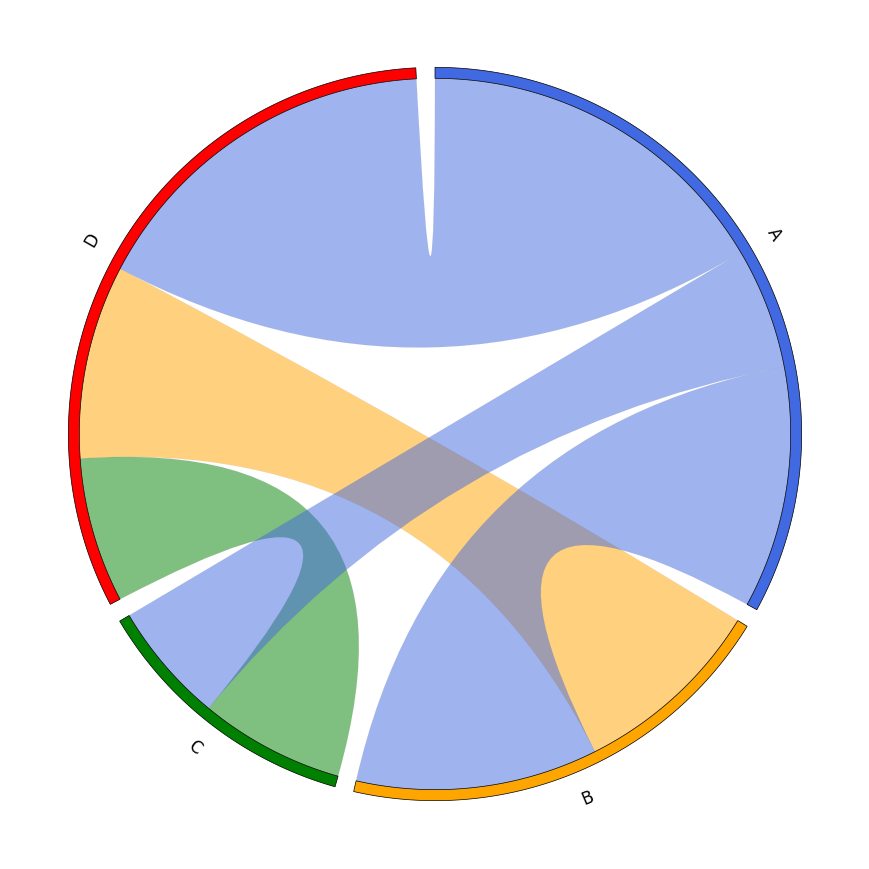

In [31]:
from pycirclize import Circos
from pycirclize.parser import Matrix
import pandas as pd

# Create from-to table dataframe & convert to matrix
fromto_table_df = pd.DataFrame(
    [
        ["A", "B", 10],
        ["A", "C", 5],
        ["A", "D", 15],
        ["B", "D", 8],
        ["C", "D", 6],
    ],
    columns=["from", "to", "value"], # Column name is optional
)
matrix = Matrix.parse_fromto_table(fromto_table_df)

# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix,
    space=3,
    cmap=dict(A="royalblue", B="orange", C="green", D="red"),
    label_kws=dict(size=12),
)

print(fromto_table_df.to_string(index=False))
fig = circos.plotfig()


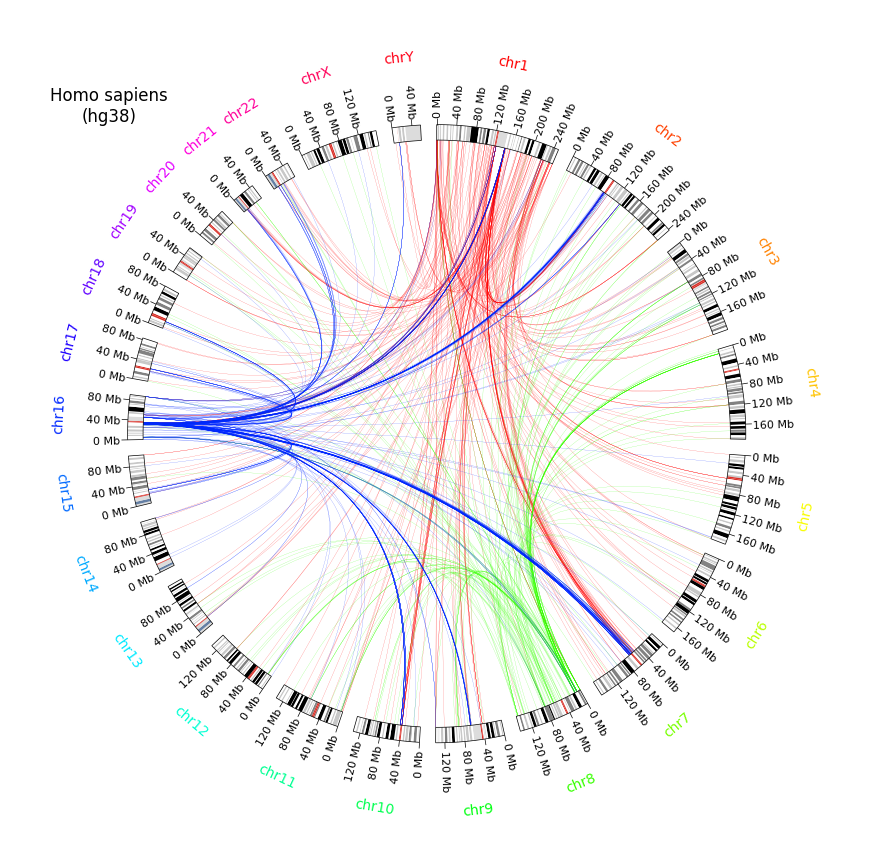

In [32]:
from pycirclize import Circos
from pycirclize.utils import ColorCycler, load_eukaryote_example_dataset

# Load hg38 dataset (https://github.com/moshi4/pycirclize-data/tree/main/eukaryote/hg38)
chr_bed_file, cytoband_file, chr_links = load_eukaryote_example_dataset("hg38")

# Initialize Circos from BED chromosomes
circos = Circos.initialize_from_bed(chr_bed_file, space=3)
circos.text("Homo sapiens\n(hg38)", deg=315, r=150, size=12)

# Add cytoband tracks from cytoband file
circos.add_cytoband_tracks((95, 100), cytoband_file)

# Create chromosome color dict
ColorCycler.set_cmap("hsv")
chr_names = [s.name for s in circos.sectors]
colors = ColorCycler.get_color_list(len(chr_names))
chr_name2color = {name: color for name, color in zip(chr_names, colors)}

# Plot chromosome name & xticks
for sector in circos.sectors:
    sector.text(sector.name, r=120, size=10, color=chr_name2color[sector.name])
    sector.get_track("cytoband").xticks_by_interval(
        40000000,
        label_size=8,
        label_orientation="vertical",
        label_formatter=lambda v: f"{v / 1000000:.0f} Mb",
    )

# Plot chromosome link
for link in chr_links:
    region1 = (link.query_chr, link.query_start, link.query_end)
    region2 = (link.ref_chr, link.ref_start, link.ref_end)
    color = chr_name2color[link.query_chr]
    if link.query_chr in ("chr1", "chr8", "chr16") and link.query_chr != link.ref_chr:
        circos.link(region1, region2, color=color)

fig = circos.plotfig()